In [ ]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
from PIL import Image

class AnimeDataset(Dataset):

    def __init__(self, image_file, transform=None):
        images = []
        for filename in os.scandir(image_file):
              if filename.is_file():
                img = Image.open(filename.path)
                images.append(img)
        self.data = np.array(images)
        
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [ ]:
dataset = AnimeDataset('../data',transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                           ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128,
                                         shuffle=True, num_workers=2)

NameError: ignored

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential( 
            nn.ConvTranspose2d( 100, 64 * 8, 5, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),

            
            nn.ConvTranspose2d( 64 * 8, 64 * 4, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
gen = Generator().to(device)
gen.apply(weights_init)
print(gen)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 3, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 64 * 2, 3, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64 * 2, 64 * 4, 3, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(64 * 4, 64 * 8, 3, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64 * 8, 1, 5, 2, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
disc = Discriminator().to(device)
disc.apply(weights_init)
print(disc)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()

num_epochs = 20
optimizerD = optim.Adam(disc.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizerG = optim.Adam(gen.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [ ]:
for epoch in range(num_epochs):
    for i, image in enumerate(dataloader, 0):
        real_imgs = image.to(device)
        batch_size = real_imgs.size(0)
        fake_imgs = gen(torch.randn(batch_size, 100, 1, 1, device=device))
        real_label = torch.ones((batch_size,), dtype=torch.float, device=device)
        fake_label = torch.zeros((batch_size,), dtype=torch.float, device=device)

        disc.zero_grad()
        output = disc(real_imgs).view(-1)
        real_D_loss = criterion(output, real_label)
        real_D_loss.backward()
        output = disc(fake_imgs.detach()).view(-1)
        fake_D_loss = criterion(output, fake_label)
        fake_D_loss.backward()
        optimizerD.step() 

        gen.zero_grad()
        output = disc(fake_imgs).view(-1)
        G_loss = criterion(output, real_label)
        G_loss.backward()
        optimizerG.step()

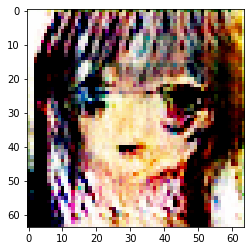

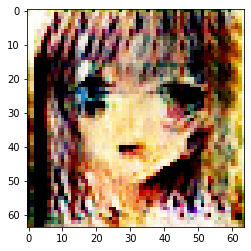

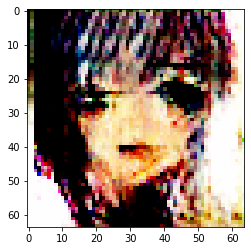

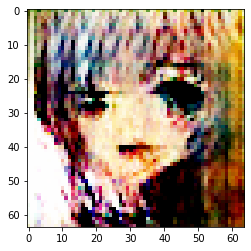

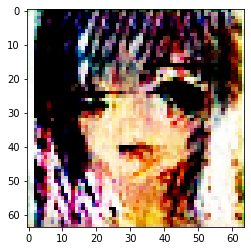

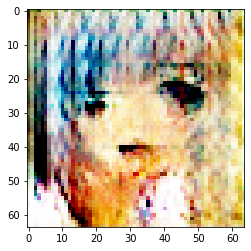

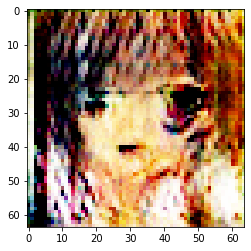

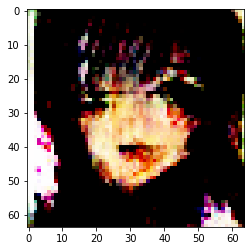

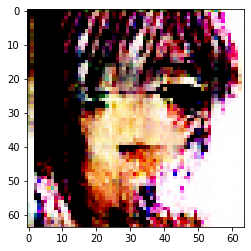

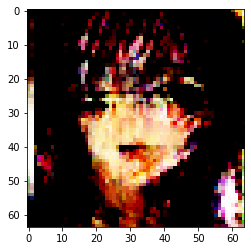

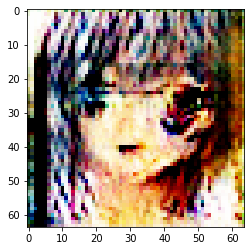

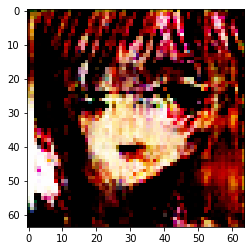

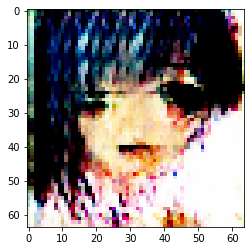

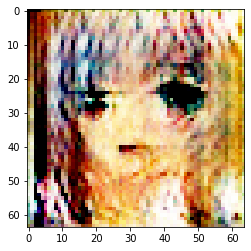

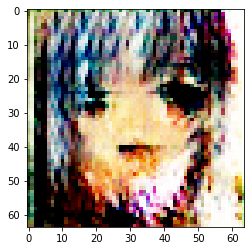

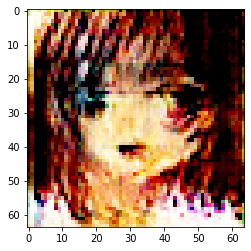

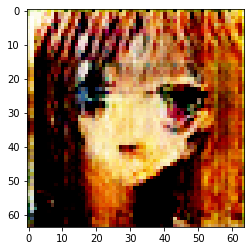

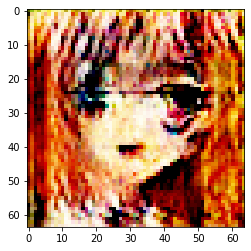

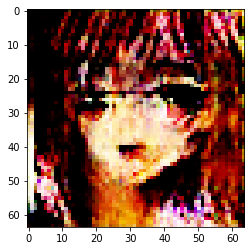

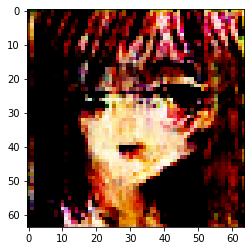

In [ ]:
import matplotlib.pyplot as plt
genModel = Generator().to(device)
genModel.load_state_dict(torch.load('AnimeGenerator.pt'))

images = genModel(torch.randn((20,100,1,1),dtype=torch.float, device=device))
for image in images:
    img = image.permute(2,1,0).detach().cpu().numpy()
    plt.imshow(np.rot90(np.rot90(np.rot90(img))))
    plt.show()